## Práctica5: Redes Neuronales 

Grupo 5: Jorge Ortega y Daniela Vidal

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

Cargamos los 1000 primeros que son los que nos interesan (0's y 1's)

In [2]:
auxX = np.load('data5/X.npy')
auxY = np.load('data5/y.npy')

X = auxX[0:1000,:]
y = auxY[0:1000]

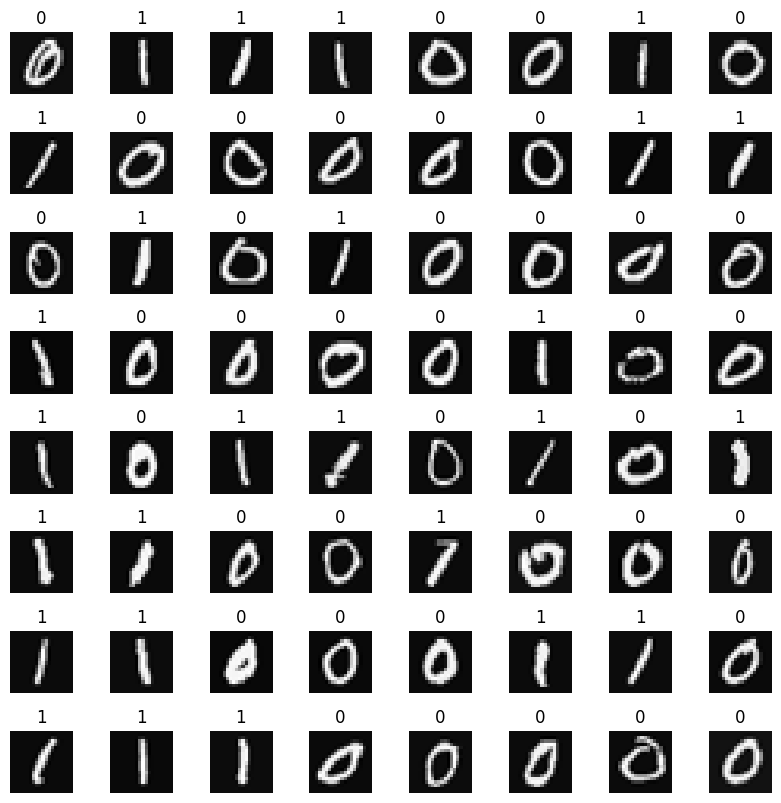

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
       
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

Creamos el modelo con Tensorflow con 2 capas ocultas de 25 neuronas la primera y 15 neuronas la segunda, con función de activación sigmoide y función de pérdida binary crossentropy.

Entrenamos el modelo con 20 iteraciones.

In [5]:
model = Sequential([Dense(units = 25, activation = 'sigmoid'), Dense(units = 15, activation = 'sigmoid'), Dense(units = 1, activation = 'sigmoid')])
model.compile(loss =BinaryCrossentropy())
model.fit(X, y, epochs = 20)

2023-03-14 22:31:08.181211: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-14 22:31:08.181388: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-14 22:31:08.182146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DAI): /proc/driver/nvidia/version does not exist
2023-03-14 22:31:08.185903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
32/32 [==============================] - 1s 4ms/step - loss: 0.6257
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4870
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3565
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2539
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1791
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1278
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0935
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0357
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 13/20
32/32 [==============================

Obtenemos las predicciones y las comparamos con los valores reales. 
Podemos ver que se obtiene un 99.9% de precisión que mejora con más iteraciones de entrenamiento.

In [9]:
# Obtenemos las predicciones
predictions = model.predict(X)

#Vemos la precisión
print("Precision: ", np.sum(np.where(predictions >= 0.5, 1, 0) == y)/ len(y)*100, "%")
print("Erroneos: ", np.sum(np.where(predictions >= 0.5, 1, 0) != y), " de ", len(y))

32/32 [==============================] - 0s 2ms/step
Precision:  99.9 %
Erroneos:  1  de  1000
